In [150]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [151]:
data = yf.download('^GSPC', start='2018-01-01')
#data = yf.download('^GSPC', start='2001-01-03', end='2005-12-31')

[*********************100%%**********************]  1 of 1 completed


In [152]:
df = data['Adj Close'].pct_change() * 100

In [153]:
df = df.rename("Today")

In [154]:
df = df.reset_index()

In [155]:
for i in range(1, 6):
    df['Lag '+str(i)] = df['Today'].shift(i)

In [156]:
df['Volume'] = data.Volume.shift(1).values/1000_000_000
df = df.dropna()

In [157]:
df['Direction'] = [1 if i>0 else 0 for i in df['Today']]

In [158]:
df = sm.add_constant(df)

In [159]:
X = df[['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y = df.Direction

In [160]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.688356
         Iterations 4


In [161]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1479
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                0.003145
Time:                        15:09:15   Log-Likelihood:                -1018.1
converged:                       True   LL-Null:                       -1021.3
Covariance Type:            nonrobust   LLR p-value:                    0.3775
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4222      0.222      1.902      0.057      -0.013       0.857
Lag 1         -0.0810      0.042     -1.950      0.051      -0.162       0.000
Lag 2          0.0163      0.042      0.392      0.695      -0.065       0.098
Lag 3         -0.0117      0.042     -0.281      0.779      -0.094       0.070
Lag 4         -0.0359      0.041     -0.867      0.386      -0.117       0.045
Lag 5         -0.0265      0.041     -0.645      0.519      -0.107       0.054
Volume        -0.0645      0.051     -1.260      0.208      -0.165       0.036
==============================================================================
"""

In [162]:
prediction = result.predict(X)

In [163]:
def confusion_matrix(act, pred): #act - actual values, pred - predicted values
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), pd.Series(predtrans), rownames=['Actual'], colnames=['Predicted'])
    return confusion_matrix

In [164]:
a = confusion_matrix(y, prediction)
print(a)

Predicted  Down   Up
Actual              
Down         85  601
Up           62  731


In [165]:

(a.iloc[1, 1] + a.iloc[0, 0])/len(df)

0.5517241379310345

In [166]:
len(df)

1479

In [167]:
(196 + 2914)/len(df)

2.1027721433400948

In [168]:
x_train = df[df.Date.dt.year < 2022][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[df.Date.dt.year < 2022]['Direction']
x_test = df[df.Date.dt.year == 2022][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_test = df[df.Date.dt.year == 2022]['Direction']


In [169]:
model = sm.Logit(y_train, x_train)

In [170]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.679291
         Iterations 5


In [171]:
prediction = result.predict(x_test)

In [172]:
confusion_matrix(y_test, prediction)

Predicted,Down,Up
Actual,,
Down,21,122
Up,14,94


In [173]:
(81+38)/len(x_test)

0.47410358565737054

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 


In [175]:
def confusion_matrix(act, pred): #act - actual values, pred - predicted values
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), pd.Series(predtrans), rownames=['Actual'], colnames=['Predicted'])
    return confusion_matrix

In [176]:
import seaborn as sns

[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.687180
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 2151
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                0.008512
Time:                        16:16:10   Log-Likelihood:                -1478.1
converged:                       True   LL-Null:                       -1490.8
Covariance Type:            nonrobust   LLR p-value:                 0.0002905
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0928      0.068     -1

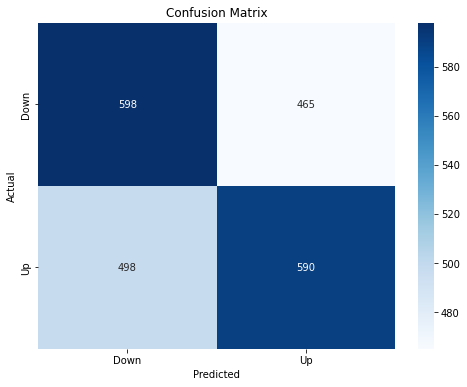

Predicted  Down   Up
Actual              
Down        598  465
Up          498  590
0.5523012552301255
Optimization terminated successfully.
         Current function value: 0.687169
         Iterations 4
Predicted  Down  Up
Actual             
Down        128  38
Up          109  56
0.5558912386706949
Optimization terminated successfully.
         Current function value: 0.688848
         Iterations 4
Predicted  Down   Up
Actual              
Down         60  106
Up           48  117
0.5347432024169184


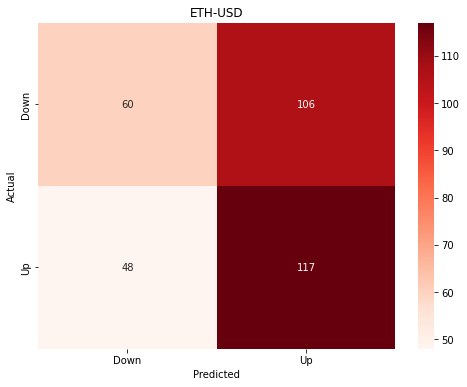

Predicted  Down   Up
Actual              
Down         60  106
Up           48  117
0.5523012552301255


In [200]:
def clean_data(symbol, start, year,  end=None):
    data = yf.download(symbol, start, end)
    df = data['Adj Close'].pct_change() * 100
    df = df.rename('Today')
    df = df.reset_index()
    for i in range(1, 6):
        df['Lag '+str(i)] = df['Today'].shift(i)
    df['Volume'] = data.Volume.shift(1).values/1000_000_000
    df = df.dropna()
    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]
    df = sm.add_constant(df)
    X = df[['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = df.Direction
    model = sm.Logit(y, X)
    result = model.fit()
    print(result.summary())
    prediction = result.predict(X)
    a = confusion_matrix(y, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(a, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Confusion Matrix")
    plt.show()
    print(a)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))

    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_test = df[df.Date.dt.year == year]['Direction']
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))


    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2']]
    y_test = df[df.Date.dt.year == year]['Direction']
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(b, annot=True, fmt="d", cmap="Reds", cbar=True)
    plt.title("Confusion Matrix")
    plt.title(symbol)
    plt.show()
    print(b)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))


clean_data('ETH-USD', '2018-01-01', 2023)

[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.688934
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1480
Model:                          Logit   Df Residuals:                     1473
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                0.002791
Time:                        16:14:28   Log-Likelihood:                -1019.6
converged:                       True   LL-Null:                       -1022.5
Covariance Type:            nonrobust   LLR p-value:                    0.4566
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1517      0.117      1

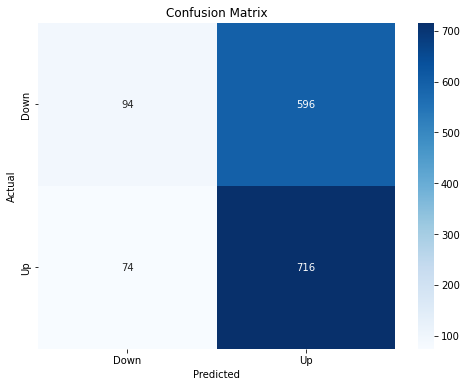

Predicted  Down   Up
Actual              
Down         94  596
Up           74  716
0.5472972972972973
Optimization terminated successfully.
         Current function value: 0.688959
         Iterations 4
Predicted  Down   Up
Actual              
Down         13   86
Up           14  114
0.5594713656387665
Optimization terminated successfully.
         Current function value: 0.689901
         Iterations 4
Predicted  Down   Up
Actual              
Down          8   91
Up            7  121
0.5682819383259912


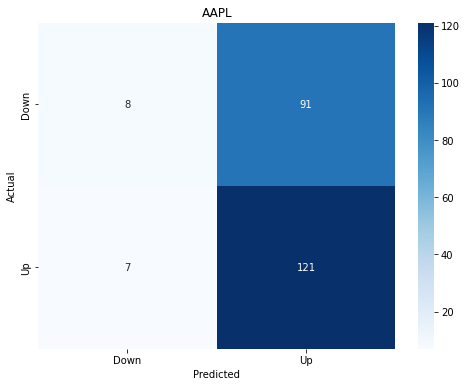

Predicted  Down   Up
Actual              
Down          8   91
Up            7  121
0.5472972972972973


In [199]:
clean_data('AAPL' , '2018-01-01', 2023)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X is your feature matrix and y is the target variable
X = np.random.rand(100, 2)
y = (X[:, 0] + 2 * X[:, 1] + np.random.randn(100) > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.85
